# PART 1: Healthcare Project 

## 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [1]:
## Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data in dataframes

datanormal = pd.read_csv("Part1 - Normal.csv")
datatypeh = pd.read_csv("Part1 - Type_H.csv")
datatypes = pd.read_csv("Part1 - Type_S.csv")

print ("Shape of normal csv", datanormal.shape)
print ("Shape of normal csv", datanormal.size)
print ("--------------------------")
print ("Shape of Type H csv", datatypeh.shape)
print ("Shape of Type H csv", datatypeh.size)
print ("--------------------------")
print ("Shape of Type S csv", datatypes.shape)
print ("Shape of Type S csv", datatypes.size)
print ("--------------------------")

Shape of normal csv (100, 7)
Shape of normal csv 700
--------------------------
Shape of Type H csv (60, 7)
Shape of Type H csv 420
--------------------------
Shape of Type S csv (150, 7)
Shape of Type S csv 1050
--------------------------


In [2]:
## Concatanete all the dataframes and create a new union of all
frames = [datanormal,datatypeh,datatypes]
dataunion = pd.concat(frames, ignore_index = True)

print ("Shape of union of all frames", dataunion.shape)
print ("Shape of union of all frames", dataunion.size)
print ("--------------------------")

Shape of union of all frames (310, 7)
Shape of union of all frames 2170
--------------------------


In [3]:
dataunion.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
dataunion.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


## 2. Data cleansing:
• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [5]:
## Check for dupes in union data

dupes = dataunion.duplicated()
print ("Duplicates in union dataframe", sum(dupes))


Duplicates in union dataframe 0


In [6]:
## No duplicates in the data
## Describe the union 

print(dataunion.describe())


       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


In [7]:
print(dataunion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [8]:
print ("Number of nulls in the union data\n ",dataunion.isnull().sum())

Number of nulls in the union data
  P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64


In [9]:
## No nulls in the data
## Now check the Class column for the uniqueness of the value

print (dataunion ['Class'].value_counts())

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64


In [10]:
## Need to replace Nrmal with Normal
dataunion = dataunion.replace(to_replace = "Nrmal", value = "Normal")
## Need to replace type_h with type_H
dataunion = dataunion.replace(to_replace = "type_h", value = "Type_H")
## Need to replace tp_s with type_S
dataunion = dataunion.replace(to_replace = "tp_s", value = "Type_S")

print (dataunion ['Class'].value_counts())

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64


## 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

In [11]:
## Check the corelation

dataunion.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


#### Basic Corelation Analysis

Strong corelation between L_angle and P_incidence

Strong corelation between S_slope and P_incidence

Medium corelation between S_Degree and L_angle

Very weak corelation between S_Degree and P_radius

Very weak corelation between P_radius and L_angle


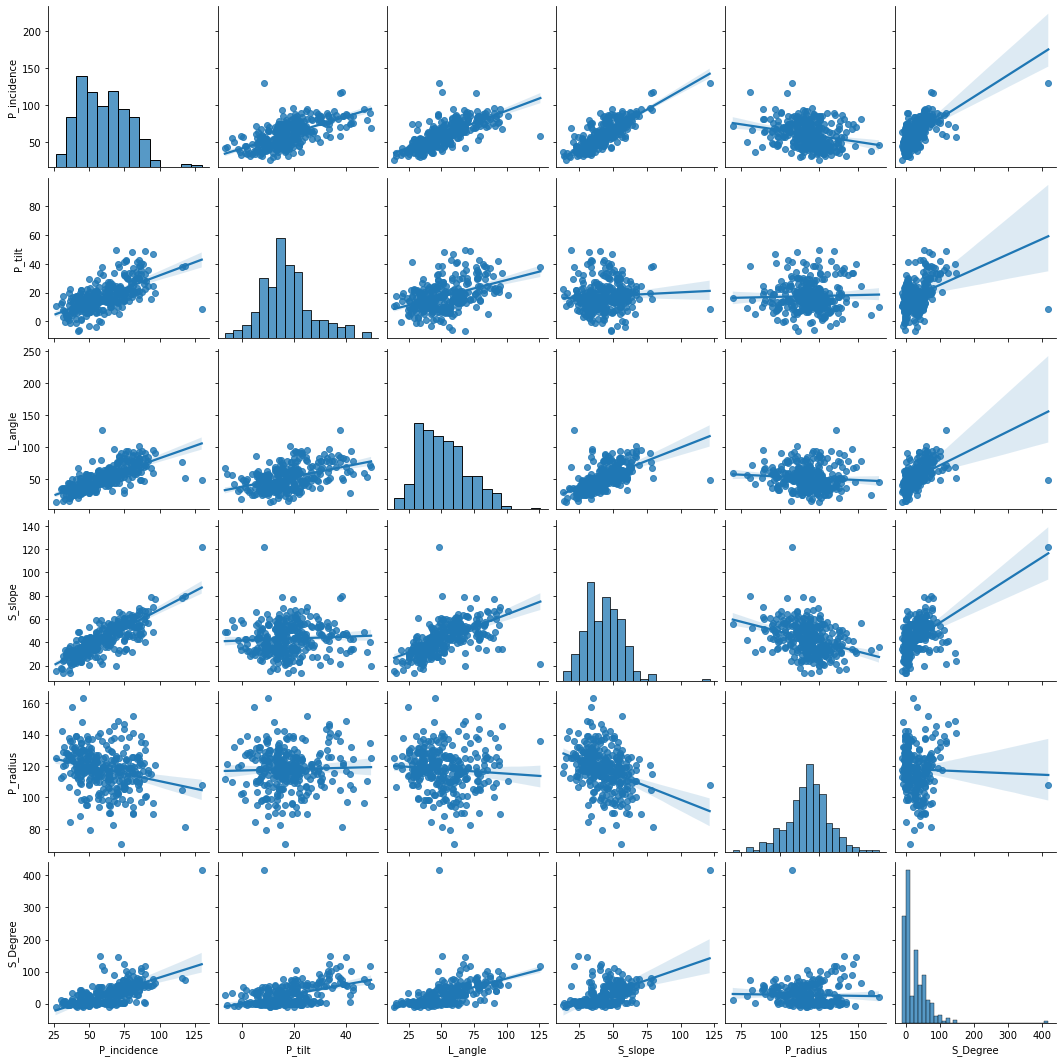

In [12]:
## Plot pairplot to check the corelation
sns.pairplot(dataunion, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal


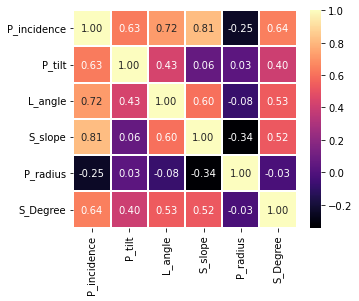

In [13]:
## Check heatmap 
fig,ax = plt.subplots(figsize=(5, 4))   
sns.heatmap(dataunion.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

/Users/mandarkhire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L_angle', ylabel='Density'>

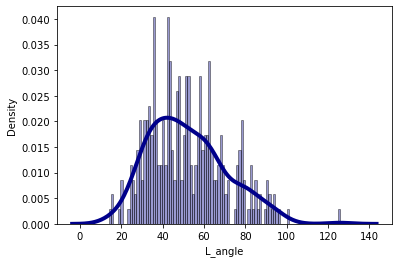

In [14]:
## Check the distribution of L_angle using histogram
sns.distplot(dataunion['L_angle'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0.5, 1.0, 'L_angle by Class variable')

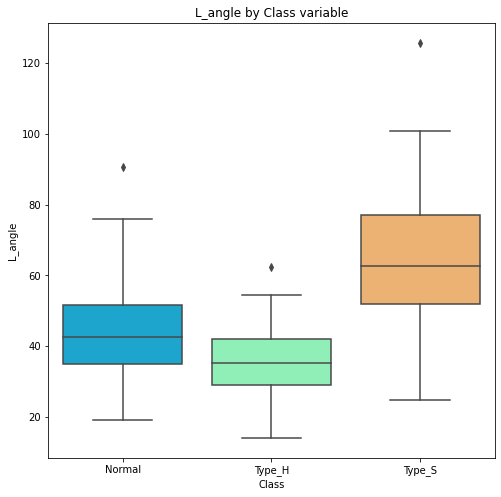

In [15]:
## Plot the Box Plot for L_angle for three different values of Class variable

plt.figure(figsize=(8,8))
sns.boxplot(x='Class',y='L_angle',data=dataunion, palette='rainbow')
plt.title("L_angle by Class variable")

- Above Boxplot shows that for Type_S, L_angle median and typical distribution is on a higher values.
- For Type_H, L_angle is on a lower side.
- For Normal, the L_angle valus are in the middle.

<AxesSubplot:xlabel='Class', ylabel='S_slope'>

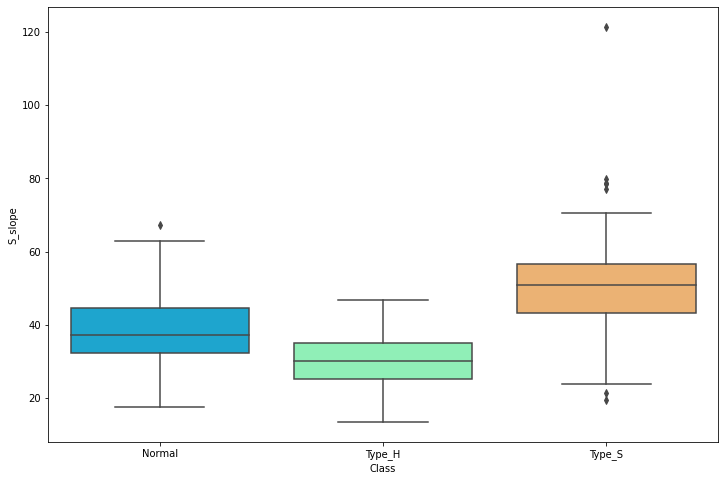

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class',y='S_slope',data=dataunion, palette='rainbow')

- Above scatter plot shows that for Type_S, S_Slope median and typical distribution is on a higher values.
- For Type_H, S_Slope is on a lower side.
- For Normal, the S_Slope value are in the middle.

Text(0.5, 1.0, 'Class by P_radius variable')

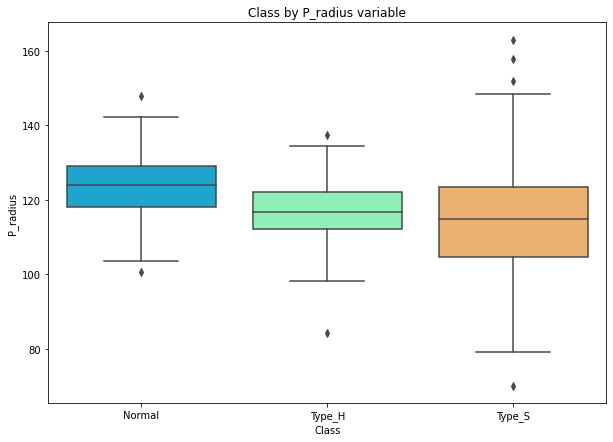

In [17]:
## P_radius variable quantative analysis 

plt.figure(figsize=(10,7))
#sns.swarmplot(x='Class', y='P_radius', data=dataunion, dodge=True, palette='viridis')
plt.title("Class v.s. P_radius")
sns.boxplot(x='Class',y='P_radius',data=dataunion, palette='rainbow')
plt.title("Class by P_radius variable")

- Above boxplot shows that for P_radius variable, there is similar distribution in Type_H and Type_S , while for Notmal class, the values are typically on a higher side.

A quantitative analysis will be done to substantiate this understanding.

- Null Hypothesis:

P_radius is having similar distribution for Type_H and Type_S.

- Alternate Hypothesis:

For Type_H and Type_S, P_radius is having different distributions.

- Significance level

Here we select α = 0.05

This is a single categorical variable with two possible values and one continuous variable. This qualifies for Innova test.

In [18]:
## Create dataframe with values as only Type_H and Type_S

data_typeh = dataunion[dataunion['Class'] == 'Type_H']
data_types = dataunion[dataunion['Class'] == 'Type_S']

data_typeh_types = pd.DataFrame()

data_typeh_types = data_typeh_types.append(data_typeh)
data_typeh_types = data_typeh_types.append(data_types)

## Let's use data_typeh_types as the frame for our analysisb

In [19]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('P_radius ~ Class', data = data_typeh_types).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Class       163.995186    1.0  0.825294  0.364688
Residual  41331.939051  208.0       NaN       NaN


#### Above result shows that P is greater than 0.05 and hence it fails to reject the null hypothesis

#### This means that for Type_H and Type_S, the P_radius follows similar distribution.
#### From qualitative analysis for Normal class, P_radius follows different distribution

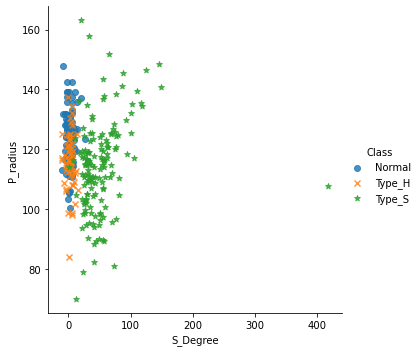

In [20]:
## Check the corelation between S_Degree and P_incidence and check the impact of Class categorical variable.

sns.lmplot(x='S_Degree', y='P_radius', markers=['o', 'x', '*'], hue='Class',
           data=dataunion,
           fit_reg=False
          )

Above distribution shows that 

- For Normal and Type_H, the relation between P_radius and S_Degree is pretty much linear.
- For Type_S, the distribution is relatively scatterred while there is a distant outlier.

Let's check the corelation of S_Degree and P_radius specifically for Class Normal and Type_H

Pearsons correlation: -0.060


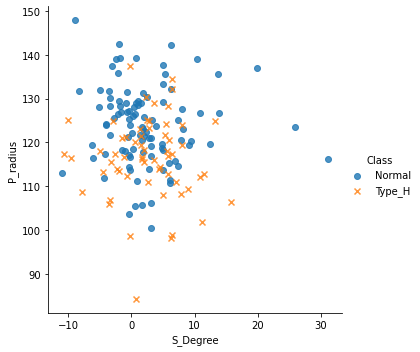

In [21]:
from scipy.stats import pearsonr
## Lets seperate the data with class as Normal
data_typenormal = dataunion[dataunion['Class'] == 'Normal']

data_typen_typeh = pd.DataFrame()

data_typen_typeh = data_typen_typeh.append(data_typenormal)
data_typen_typeh = data_typen_typeh.append(data_typeh)



# calculate Pearson's correlation
corr, _ = pearsonr(data_typen_typeh['S_Degree'], data_typen_typeh['P_radius'])
print('Pearsons correlation: %.3f' % corr)

sns.lmplot(x='S_Degree', y='P_radius', markers=['o', 'x'], hue='Class',
           data=data_typen_typeh,
           fit_reg=False
          )

#### This analysis shows that S_Degree and P_radius corelation is on pretty lower side irrespective of the Class.

### Distribution of P_incidence for different values of class variable

Text(0.5, 1.0, 'P_incidence by Class variable')

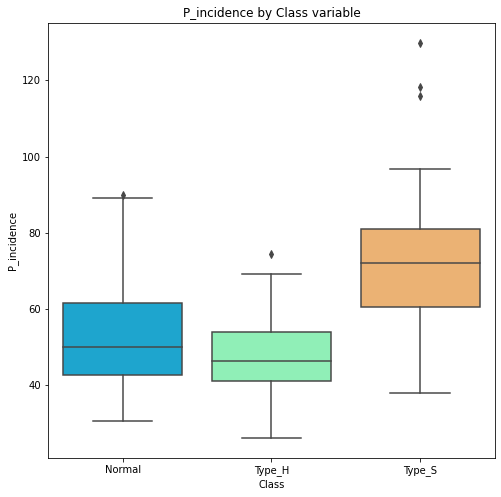

In [22]:
## Plot the Box plot
plt.figure(figsize=(8,8))
sns.boxplot(x='Class',y='P_incidence',data=dataunion, palette='rainbow')
plt.title("P_incidence by Class variable")


#### Quantitative analysis for P_incidence variable

- Null Hypothesis
P_incidence variable has similar distribution for Normal and Type_H values of Class 

- Alternative Hypothesis

P_incidence variable has different distribution for Normal and Type_H values of Class

- Significance level

Here we select α = 0.05

This is a single categorical variable with two possible values and one continuous variable. This qualifies for Innova test.




In [23]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('P_incidence ~ Class', data = data_typen_typeh).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
Class       614.133571    1.0  4.431654  0.03686
Residual  21895.458720  158.0       NaN      NaN


#### P is 0.03686 which is less than 0.05 and hence below Significance level. So this fails the null hypothesis and alternative hypothesis holds true.

P_incidence variable has different distribution for Normal and Type_H values of Class


#### P_tilt and P_incidence corelation

Pearson correlation between P_tilt and P_incidence for Normal Class : 0.634
Pearson correlation between P_tilt and P_incidence for Type_H Class : 0.710
Pearson correlation between P_tilt and P_incidence for Type_S Class : 0.601


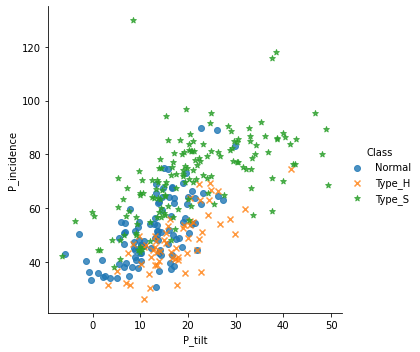

In [24]:
sns.lmplot(x='P_tilt', y='P_incidence', markers=['o', 'x','*'], hue='Class',
           data=dataunion,
           fit_reg=False
          )

# calculate Pearson's correlation
corr, _ = pearsonr(dataunion[dataunion['Class'] == 'Normal'] ['P_tilt'], dataunion[dataunion['Class'] == 'Normal']['P_incidence'])
print('Pearson correlation between P_tilt and P_incidence for Normal Class : %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(dataunion[dataunion['Class'] == 'Type_H'] ['P_tilt'], dataunion[dataunion['Class'] == 'Type_H']['P_incidence'])
print('Pearson correlation between P_tilt and P_incidence for Type_H Class : %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(dataunion[dataunion['Class'] == 'Type_S'] ['P_tilt'], dataunion[dataunion['Class'] == 'Type_S']['P_incidence'])
print('Pearson correlation between P_tilt and P_incidence for Type_S Class : %.3f' % corr)

P_incidence and P_tilt corelation is nearing almost linear and is similar across all values of Class categorical variable

## 4. Data pre-processing:
• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.

### Segregate predictors vs target attributes

#### Class is the target attribute and other attributes are predictors

In [25]:
## Calculate the percentage of different values of target variable - Class.

print ("Count and Percentage of Normal variable is {0} ({1:2.2f}%)".format(data_typenormal.shape[0], (data_typenormal.shape[0] / dataunion.shape[0] * 100 )))
print ("Count and Percentage of Type_H variable is {0} ({1:2.2f}%)".format(data_typeh.shape[0], (data_typeh.shape[0] / dataunion.shape[0] * 100 )))
print ("Count and Percentage of Type_S variable is {0} ({1:2.2f}%)".format(data_types.shape[0], (data_types.shape[0] / dataunion.shape[0] * 100 )))


Count and Percentage of Normal variable is 100 (32.26%)
Count and Percentage of Type_H variable is 60 (19.35%)
Count and Percentage of Type_S variable is 150 (48.39%)


In [26]:
## Remove the target variable Class 

X = dataunion.drop(labels= "Class" , axis = 1)
y = dataunion["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


#### Perform normalization of the X data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


#### Perform train-test split

In [28]:
## Split train and test data in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=40)

## 5. Model training, testing and tuning:
• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

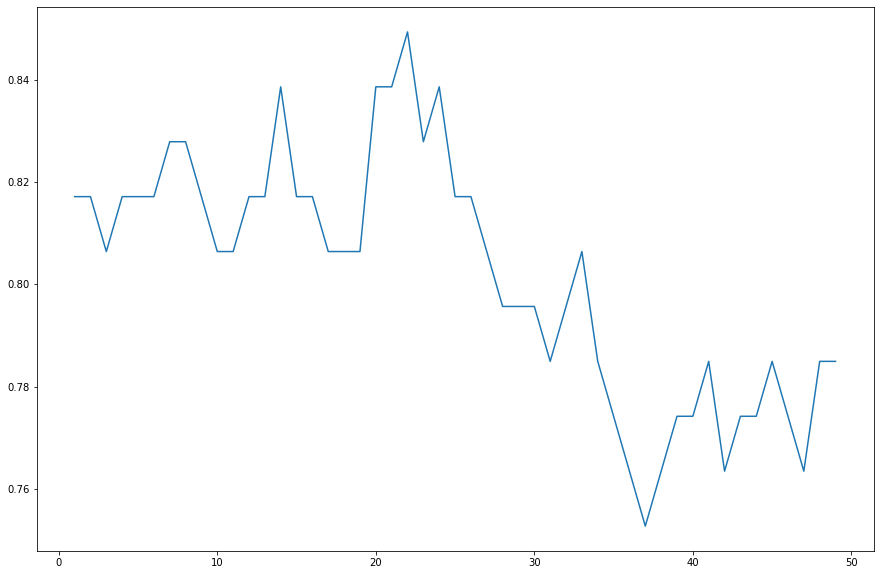

In [29]:
## Design and train a KNN classifier

scores =[] 

for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    CurrentScore = NNH.score(X_test, y_test)
    scores.append(CurrentScore) 
        
# Plot the accuracy v.s K value on test data and identify the optimum K value

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(range(1,50),scores)

In [30]:
NNH = KNeighborsClassifier(n_neighbors = 22, weights = 'distance' )
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

0.8494623655913979

Above graph shows various values of accuracies (on Y) v.s. value of K

#### After analysis, the right K value for the given dataset looks to be 22, which gives 85% accuracy on test data.

## 6. Conclusion and improvisation:

### Write your conclusion on the results.

### Statistical Conclusions:

#### Corelations

- Strong corelation between L_angle and P_incidence
- Strong corelation between S_slope and P_incidence
- Medium corelation between S_Degree and L_angle
- Very weak corelation between S_Degree and P_radius
- Very weak corelation between P_radius and L_angle

#### L_angle variable analysis
- From qualitative analysis, it is observed that L_angle is distributed differently across different values of Class 

#### S_Slope variable analysis 
- From qualitative analysis, it is observed that S_Slope is distributed differently across different values of Class 

#### P_radius variable analysis
- From qualitative analysis, it is visible that there is similar distribution in Type_H and Type_S , while for Notmal class, the values are typically on a higher side

- From quantitative analysis, it is proved that for Type_H and Type_S values of class, the P_radius follows similar distribution

#### Corelation between S_Degree and P_incidence and check the impact of Class categorical variable.

- Both the qualitative and quantitative analysis shows that there is very poor Corelation between S_Degree and P_incidence

#### Distribution of P_incidence for different values of class variable

- Both qualitative and quantative analysis shows that distribution of P_incidence variable across different values of Class categorical variable is significantly different

#### P_tilt and P_incidence corelation

- Both qualitative and quantitative analysis show that, P_incidence and P_tilt corelation is nearing almost linear and is similar across all values of Class categorical variable

### KNN Classifier

With KNN classifier, by randomly segragating the train and test data in 70:30 ratio, the model is built. 

After trying multiple values of K and plotting them against accuracy on test data, the model provides 85% accuracy with K as 22.

### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

#### In the Class variable, please ensure to maintain consistency. In the provided data. Below were observations and corrections had to be done.
 - Normal"was mispelled to "Nrml" several times.
 - No uniformity in "Type_H" and it was spelled as "type_h" several places.
 - Short form of "Type_S" was used multiple places as "tp_s".

## PART 2: Banking and Finance Project

### 1. Import and warehouse data:

#### - Import all the given datasets and explore shape and size of each.
#### - Merge all datasets onto one and explore final shape and size.


In [31]:
## Import and warehouse data


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read CSV file
fdata1 = pd.read_csv("Part2 - Data1.csv")
fdata2 = pd.read_csv("Part2 -Data2.csv")

## check the shape of the data1
print ("Part2 - Data1.csv dataset (Data1) shape: ", fdata1.shape)

## check the shape of data2
print ("Part2 -Data2.csv dataset (Data2) shape: ", fdata2.shape)

print ("Data1 head and tail records")
print (fdata1.head(10))
print (fdata1.tail(10))


Part2 - Data1.csv dataset (Data1) shape:  (5000, 8)
Part2 -Data2.csv dataset (Data2) shape:  (5000, 7)
Data1 head and tail records
   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   
5   6   37             13            29    92121            4   
6   7   53             27            72    91711            2   
7   8   50             24            22    93943            1   
8   9   35             10            81    90089            3   
9  10   34              9           180    93023            1   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7   

In [33]:
print ("Data2 head and tail records")
print (fdata2.head(10))
print (fdata2.tail(10))

Data2 head and tail records
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   
5   6       155         0                    0                1           0   
6   7         0         0                    0                1           0   
7   8         0         0                    0                0           1   
8   9       104         0                    0                1           0   
9  10         0         0                    0                0           0   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5     

In [34]:
## ID is the column common on both first and second dataframe.
print ("fdata1 check if any ID column duplicate\n", fdata1['ID'].value_counts())

print ("fdata2 check if any ID column duplicate\n", fdata2['ID'].value_counts())


## Total two data frames with ID as a common attribute and ID is a unique value in both the datasets.
## Total number of rows are 5000 each in these datasets.
## Using these inputs, the two datasets can be merged using inner join on ID column. 
## copy the merged dataframe in the fdata variable.

fdata = pd.merge(left=fdata1, right=fdata2, left_on='ID', right_on='ID')

print ("Shape of the merged dataframe:",fdata.shape)




fdata1 check if any ID column duplicate
 1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
fdata2 check if any ID column duplicate
 1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
Shape of the merged dataframe: (5000, 14)


In [35]:
print ("Merged dtaframe head and tail \n", fdata.head(10))
print(fdata.tail(10))

Merged dtaframe head and tail 
    ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   
5   6   37             13            29    92121            4   
6   7   53             27            72    91711            2   
7   8   50             24            22    93943            1   
8   9   35             10            81    90089            3   
9  10   34              9           180    93023            1   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1 

### 2. Data cleansing:

#### - Explore and if required correct the datatypes of each attribute
#### - Explore for null values in the attributes and if required drop or impute values.

In [36]:
## Data Cleansing of the merged dataframe

## Data exploration.
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [37]:
## Some visible null values seen in LoanOnCard column.
## Drop rows with null values

# filling a null values using fillna() 
fdata = fdata.dropna()
print ("Value_Counts for LoanOnCard:\n", fdata['LoanOnCard'].value_counts())

Value_Counts for LoanOnCard:
 0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [38]:
## Print all rows in fdata where any of the coulmns is having null values

#print (fdatanull[fdata.isna().any(axis=1)])

In [39]:
## The null dataframe is empty which indicates no nulls in the dataframe now

## It is visible that there are variables with LoanOnCard as True (1) and CreditCard as 0.

## It is not possible not to have credit card and have the loan.

## This data looks faulty and should be cleaned up for accurate model.

## Identify the rows with this type of data

fdatawrong = fdata.query('LoanOnCard == True & CreditCard == 0')

print (fdatawrong.info())

## Remove those records from the main dataset

fdata = fdata[~fdata['ID'].isin(fdatawrong['ID'])]



<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 9 to 4941
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   337 non-null    int64  
 1   Age                  337 non-null    int64  
 2   CustomerSince        337 non-null    int64  
 3   HighestSpend         337 non-null    int64  
 4   ZipCode              337 non-null    int64  
 5   HiddenScore          337 non-null    int64  
 6   MonthlyAverageSpend  337 non-null    float64
 7   Level                337 non-null    int64  
 8   Mortgage             337 non-null    int64  
 9   Security             337 non-null    int64  
 10  FixedDepositAccount  337 non-null    int64  
 11  InternetBanking      337 non-null    int64  
 12  CreditCard           337 non-null    int64  
 13  LoanOnCard           337 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 39.5 KB
None


In [40]:
## Chect the cleaned dataframe once again.

print (fdata.info())

print ( fdata['CreditCard'].value_counts())

print (fdata['LoanOnCard'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 10 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4643 non-null   int64  
 1   Age                  4643 non-null   int64  
 2   CustomerSince        4643 non-null   int64  
 3   HighestSpend         4643 non-null   int64  
 4   ZipCode              4643 non-null   int64  
 5   HiddenScore          4643 non-null   int64  
 6   MonthlyAverageSpend  4643 non-null   float64
 7   Level                4643 non-null   int64  
 8   Mortgage             4643 non-null   int64  
 9   Security             4643 non-null   int64  
 10  FixedDepositAccount  4643 non-null   int64  
 11  InternetBanking      4643 non-null   int64  
 12  CreditCard           4643 non-null   int64  
 13  LoanOnCard           4643 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 544.1 KB
None
0    3177
1    1466
Name: CreditCa

In [41]:
print (fdata.describe())

                ID          Age  CustomerSince  HighestSpend       ZipCode  \
count  4643.000000  4643.000000    4643.000000   4643.000000   4643.000000   
mean   2522.572475    45.387896      20.155072     68.726901  93158.103381   
std    1439.667354    11.451078      11.457773     42.597532   2147.051121   
min      11.000000    23.000000      -3.000000      8.000000   9307.000000   
25%    1279.500000    35.000000      10.000000     38.000000  91942.000000   
50%    2525.000000    45.000000      20.000000     61.000000  93460.000000   
75%    3771.500000    55.000000      30.000000     89.000000  94608.000000   
max    5000.000000    67.000000      43.000000    224.000000  96651.000000   

       HiddenScore  MonthlyAverageSpend        Level     Mortgage  \
count  4643.000000          4643.000000  4643.000000  4643.000000   
mean      2.382511             1.799412     1.853974    53.675210   
std       1.148839             1.634357     0.840461    95.827425   
min       1.000000   

In [42]:
## Convert LoanOnCard type from float to boolean
fdata['LoanOnCard'] = fdata['LoanOnCard']. astype('bool')
print(fdata['LoanOnCard'].value_counts())
print (fdata.info())

## Convert CreditCard type from float to boolean
fdata['CreditCard'] = fdata['CreditCard']. astype('bool')
print(fdata['CreditCard'].value_counts())
print (fdata.info())

False    4500
True      143
Name: LoanOnCard, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 10 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4643 non-null   int64  
 1   Age                  4643 non-null   int64  
 2   CustomerSince        4643 non-null   int64  
 3   HighestSpend         4643 non-null   int64  
 4   ZipCode              4643 non-null   int64  
 5   HiddenScore          4643 non-null   int64  
 6   MonthlyAverageSpend  4643 non-null   float64
 7   Level                4643 non-null   int64  
 8   Mortgage             4643 non-null   int64  
 9   Security             4643 non-null   int64  
 10  FixedDepositAccount  4643 non-null   int64  
 11  InternetBanking      4643 non-null   int64  
 12  CreditCard           4643 non-null   int64  
 13  LoanOnCard           4643 non-null   bool   
dtypes: bool(1), float64(1), int6

### 3. Data analysis & visualisation:

#### - Perform detailed statistical analysis on the data.
#### - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

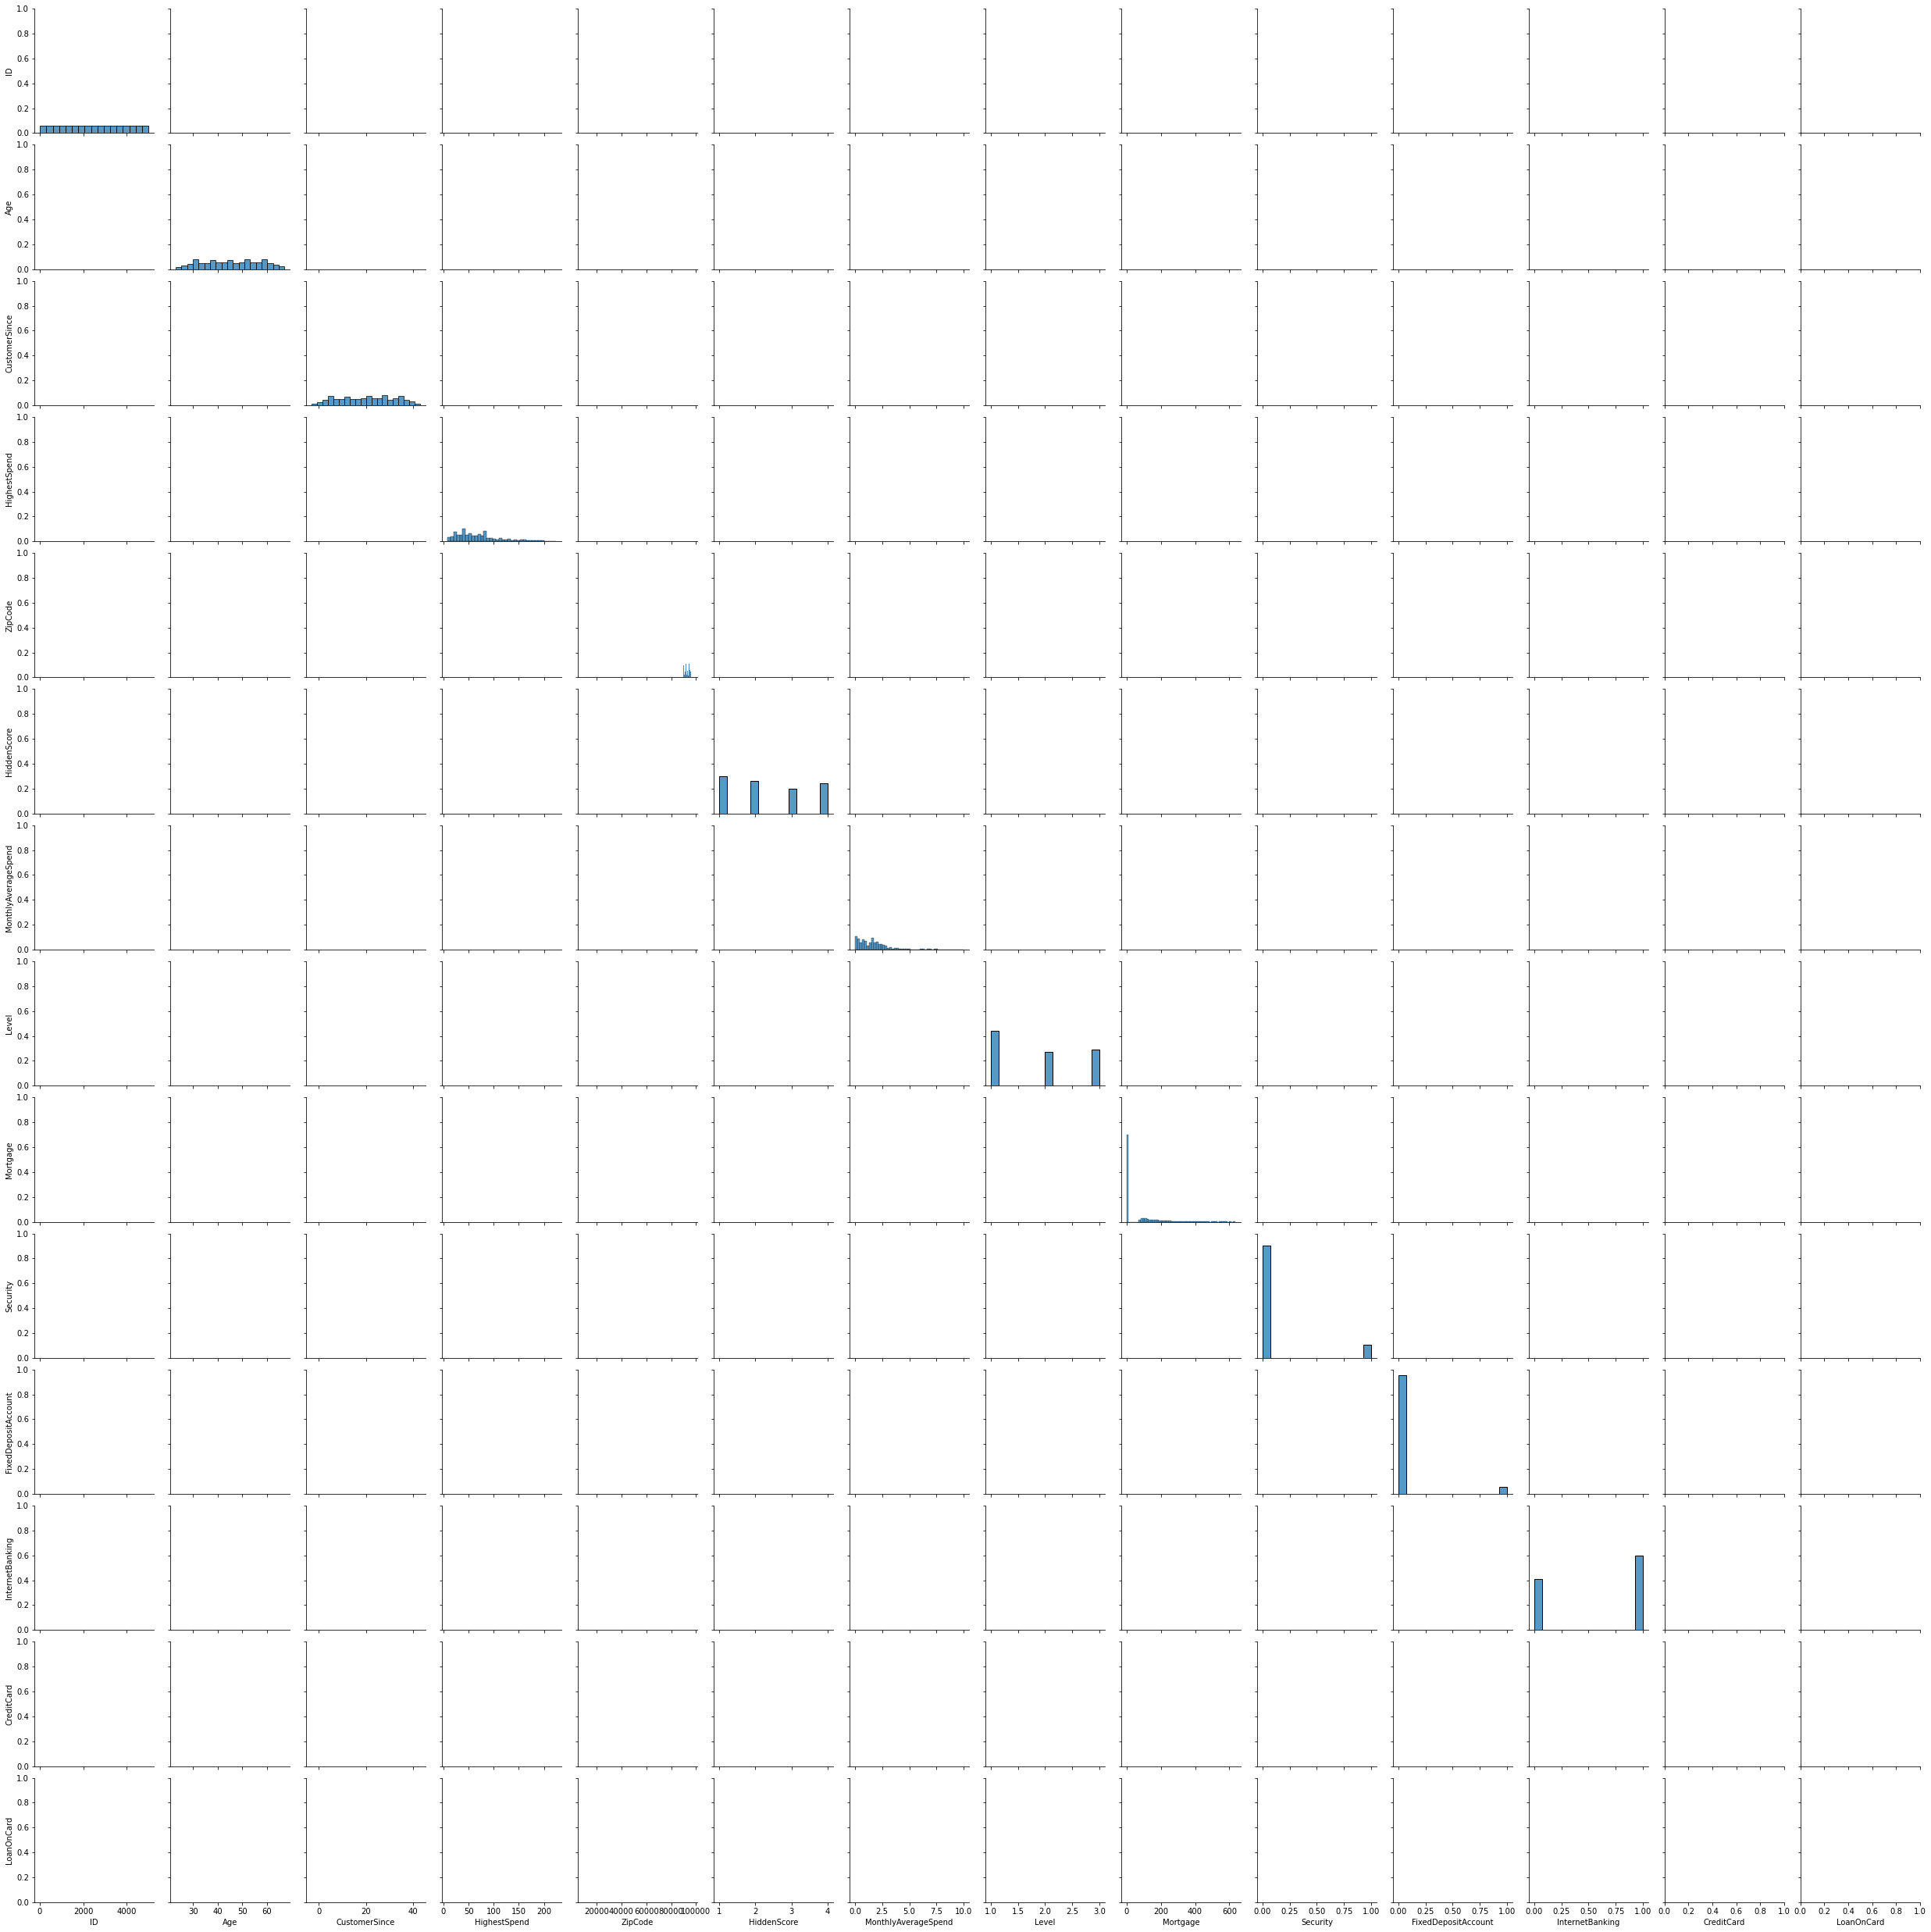

In [43]:
## Statistical Analysis

## Let's check the corelation

import seaborn as sns

sns.pairplot(fdata, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

#### Above graphs shows that there is very little corelation between different variables. 

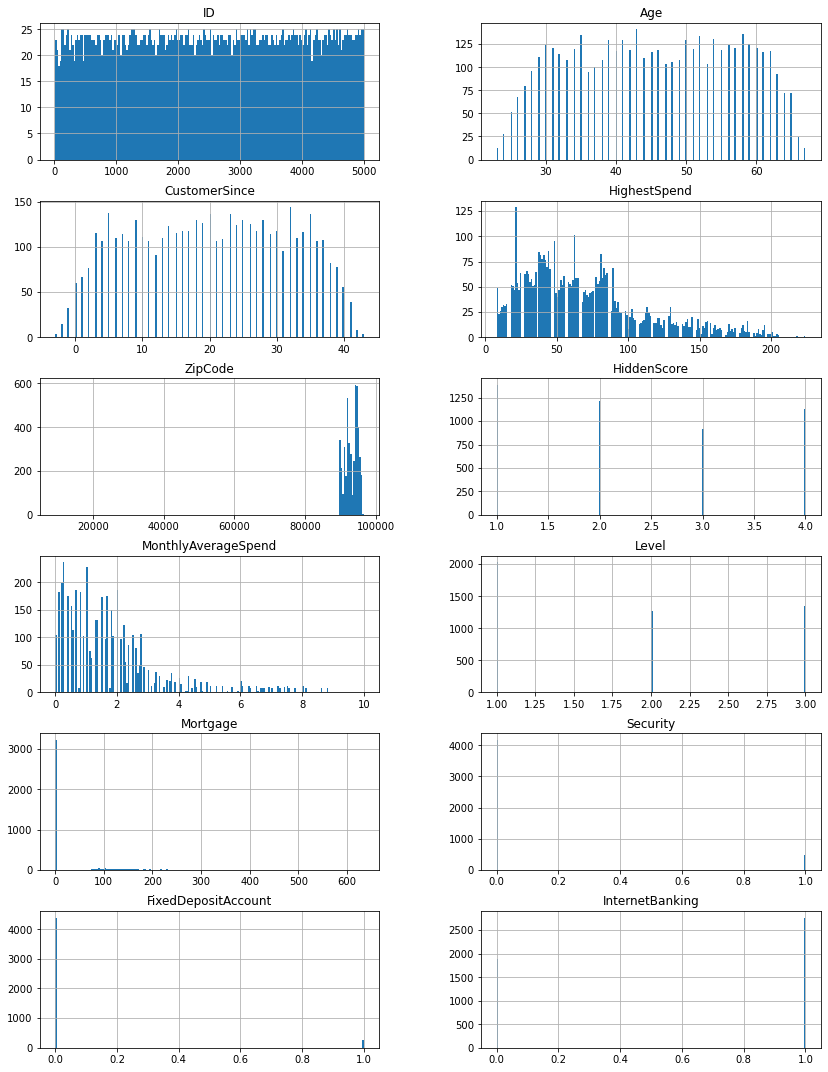

In [44]:
## Plot the histograms
fdata.hist(stacked=False, bins=200, figsize=(14,45), layout=(14,2)); 

In [45]:
## Identify the corelation between different variables

fdata.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.006126,-0.005406,-0.009295,0.015056,-0.016860,-0.012949,0.026385,-0.017677,-0.014543,0.002950,-0.002224,0.010767,-0.002106
Age,-0.006126,1.000000,0.994185,-0.057336,-0.031887,-0.046815,-0.055406,0.044969,-0.018489,0.001857,0.004218,0.010213,0.005639,0.002344
CustomerSince,-0.005406,0.994185,1.000000,-0.046111,-0.031427,-0.053866,-0.051351,0.015215,-0.016142,0.000869,0.006639,0.010313,0.007024,0.004007
HighestSpend,-0.009295,-0.057336,-0.046111,1.000000,-0.016231,-0.201326,0.631261,-0.281888,0.186746,-0.006474,0.164547,0.011366,0.078583,0.320892
ZipCode,0.015056,-0.031887,-0.031427,-0.016231,1.000000,0.013045,-0.005610,-0.017734,0.009450,0.004782,0.024524,0.020456,0.005798,0.015067
HiddenScore,-0.016860,-0.046815,-0.053866,-0.201326,0.013045,1.000000,-0.136974,0.076380,-0.036933,0.026889,0.016015,0.016181,0.019055,0.049161
MonthlyAverageSpend,-0.012949,-0.055406,-0.051351,0.631261,-0.005610,-0.136974,1.000000,-0.206117,0.095670,0.004966,0.124896,-0.007295,0.050840,0.238791
Level,0.026385,0.044969,0.015215,-0.281888,-0.017734,0.076380,-0.206117,1.000000,-0.041764,-0.010421,0.012641,-0.016834,0.009415,0.071027
Mortgage,-0.017677,-0.018489,-0.016142,0.186746,0.009450,-0.036933,0.095670,-0.041764,1.000000,-0.008063,0.084720,-0.013708,0.012168,0.105739
Security,-0.014543,0.001857,0.000869,-0.006474,0.004782,0.026889,0.004966,-0.010421,-0.008063,1.000000,0.270277,0.008581,-0.011614,0.009480


#### Some observations from the corelation chart

- Most of the variables show very weak corelation amongst themselves.
- 'Age' and 'CustomerSince' show strong corelation.
- 'MonthlyAverageSpend' and 'HighestSpend' show some corelation
- 'LoanOnCard' and 'HighestSpend' show some corelation between them


### 4. Data pre-processing:
#### - Segregate predictors vs target attributes
#### - Check for target balancing and fix it if found imbalanced.
#### - Perform train-test split.

In [46]:
## Segregation of predictors vs target variables
## As the ask is to increase the borrower's base, 
## the target should be concetrated on 'LoanOnCard' and 'CreditCard' variables

## Identify the percentage distributions of both of these variables.
n_true_card = len(fdata.loc[fdata['CreditCard'] == True])
n_false_card = len(fdata.loc[fdata['CreditCard'] == False])
print("Number of Credit Card holders: {0} ({1:2.2f}%)".format(n_true_card, (n_true_card / (n_true_card + n_false_card)) * 100 ))
print("Number of Non Credit card holders: {0} ({1:2.2f}%)\n".format(n_false_card, (n_false_card / (n_true_card + n_false_card)) * 100))


n_true_loan = len(fdata.loc[fdata['LoanOnCard'] == True])
n_false_loan = len(fdata.loc[fdata['LoanOnCard'] == False])
print("Number of Credit Card loan holders: {0} ({1:2.2f}%)".format(n_true_loan, (n_true_loan / (n_true_loan + n_false_loan)) * 100 ))
print("Number of non credit card loan holders: {0} ({1:2.2f}%)\n".format(n_false_loan, (n_false_loan / (n_true_loan + n_false_loan)) * 100))


Number of Credit Card holders: 1466 (31.57%)
Number of Non Credit card holders: 3177 (68.43%)

Number of Credit Card loan holders: 143 (3.08%)
Number of non credit card loan holders: 4500 (96.92%)



In [47]:
## Split the data in 70:30 (70% for training and 30% for testing) for Credit card

from sklearn.model_selection import train_test_split

X = fdata.drop('LoanOnCard',axis=1)  
## Columns 'ID' id dropped as being irrelevant
X = X.drop('ID',axis=1)
Y = fdata['LoanOnCard']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
2294,39,15,129,90035,2,1.9,1,0,0,0,0,False
2770,36,6,69,90024,4,4.0,3,0,0,0,1,False
1899,59,33,34,94115,1,0.2,1,0,0,0,1,False
2640,39,13,81,94309,2,2.8,1,0,0,0,1,False
2734,56,31,64,94126,4,0.9,1,0,0,0,1,False


In [48]:
## Identify the percentage distributions of both of these variables.
print("Training True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training True Values    : 87 (3.12%)
Training False Values   : 2698 (96.88%)

Test True Values        : 56 (3.01%)
Test False Values       : 1802 (96.99%)



#### There is a fair distribution of training and test data for the target variable 'LoanOnCard'

### 5. Model training, testing and tuning:
#### - Design and train a Logistic regression and Naive Bayes classifiers.
#### - Display the classification accuracies for train and test data.
#### - Display and explain the classification report in detail.
#### - Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

In [51]:
## Data balancing

from collections import Counter

import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({False: 2698, True: 87})
Resample dataset shape Counter({False: 2698, True: 2698})


In [52]:
## Let's train Logistic Regression 

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

x_train = x_smote
y_train = y_smote
# Fit the model on train
model = LogisticRegression(solver="liblinear", penalty = 'l1')

## Changing penalty to l1 provides better precision and recall

model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.088633  0.053146  0.057576 -0.000133  0.529377  0.574656  0.824212   

         7         8         9        10        11  intercept  
0 -0.00228 -5.597855  8.448368 -8.465959  9.668794  -3.201617  


In [53]:
model_score = model.score(x_test, y_test)
print("Logistic Regression: Model Accuracy (Test Data) ", model_score)

Logistic Regression: Model Accuracy (Test Data)  0.961248654467169


Confusion Matrix - Logistic Regression model


<AxesSubplot:>

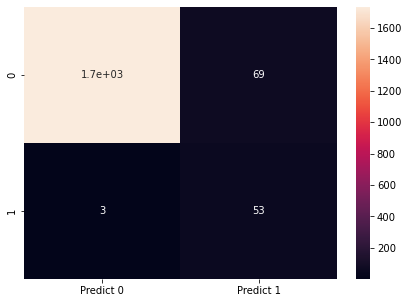

In [54]:
print ("Confusion Matrix - Logistic Regression model")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [55]:
## Let's print Classification report

print("Classification Report - Logistic Regression model")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report - Logistic Regression model
              precision    recall  f1-score   support

           1       0.43      0.95      0.60        56
           0       1.00      0.96      0.98      1802

    accuracy                           0.96      1858
   macro avg       0.72      0.95      0.79      1858
weighted avg       0.98      0.96      0.97      1858



In [56]:
## Naive Bayes classifiers

## Let's use the same train and test data for Naive Bayes classifiers

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
cred_model = GaussianNB()

cred_model.fit(x_train, y_train)

GaussianNB()

In [57]:
## Perform the predictions on train data and check the accuracy
cred_train_predict = cred_model.predict(x_train)

from sklearn import metrics

print("Naive Bayes classifiers: Model Accuracy(Train Data): {0:.4f}".format(metrics.accuracy_score(y_train, cred_train_predict)))
print()

Naive Bayes classifiers: Model Accuracy(Train Data): 0.9633



In [58]:
## Perform the predictions on test data and check the accuracy
cred_test_predict = cred_model.predict(x_test)

from sklearn import metrics

print("Naive Bayes classifiers: Model Accuracy (Test Data): {0:.4f}".format(metrics.accuracy_score(y_test, cred_test_predict)))
print()

Naive Bayes classifiers: Model Accuracy (Test Data): 0.9214



Confusion Matrix - Naive Bayes classifiers Model


<AxesSubplot:>

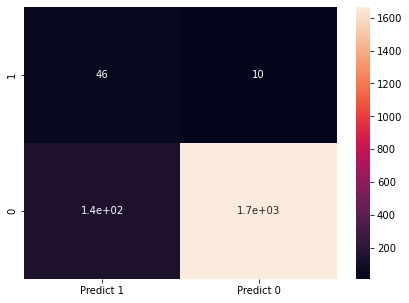

In [59]:
## Plot the Confusion matrix
print("Confusion Matrix - Naive Bayes classifiers Model")
cm=metrics.confusion_matrix(y_test, cred_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [60]:
## Let's print Classification report

print("Classification Report - Naive Bayes classifiers Model")
print(metrics.classification_report(y_test, cred_test_predict, labels=[1, 0]))

Classification Report - Naive Bayes classifiers Model
              precision    recall  f1-score   support

           1       0.25      0.82      0.39        56
           0       0.99      0.92      0.96      1802

    accuracy                           0.92      1858
   macro avg       0.62      0.87      0.67      1858
weighted avg       0.97      0.92      0.94      1858



### 6. Conclusion and improvisation:
#### - Write your conclusion on the results.
#### - Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

#### Conclusion

- With Logistic Regression
  - The accuracy of 0.97 is overall very good
  - The precision is for 1 is 0.75 while Recall is 0.07. This means false negatives are on higher side. 
  - If 'False Negatives' are on higher side, that means that probable credit card load customers would be recognised as non probable customers, which is not the desired scenario.
  
  
- With Naive Bayes classifiers
  - The accuracy of 0.95 is overall very good
  - The precision for 1 is 0.39 while Recall is 0.91. This means false negatives are under control. 
  - If 'False Negatives' are on lower side, that means that probable credit card load customers being recognised as non probable loan customers is a very less probable scenario.
  - However, lots of customers are predicted as probable loan customers, even though at actuals they are not (resulting in higher numbers of False positives).
  
  
- Conclusion
  - Both the models have similar accuracy. However given the nature of use case, it is desirable that there should be minimum false negatives as that would mean that the probable loan customer would be predicted as non probable customer and would result in loss of business.
  - Considering this as the criteria, Naive Bayes Classifiers model looks better suit for this particular use case.


  


#### Suggestions on improement for data quality

1. 'LoanOnCard' field had few of null values thus requiring to delete the rows entirely. Please ensure that this data is rightly populated.
    
2. 'LoanOnCard' field, essentially indicates if the customer has taken loan on bank credit card or not. If this value is 1, then the customer must be owning credit card for the Bank. There were quite a few rows, where CreditCard column was False even if LoanOnCard column was True. This is the contradictory data and such rows had to be removed. Please ensure that this field is rightly populated to ensure better results.